<br>
# ** 5-2 Finance Analysis - Rolling**
파이썬을 활용한 금융분석

<br><br>
## **1 이동평균선을 활용한 매매 분석**
Golden Cross / Death Cross

<br>
### **01 데이터 불러오기**
pandas datareader

In [1]:
# from pandas_datareader import get_data_yahoo
# start_date = '2013-01-01'
# codes = ['KO', 'MS', '005930.KS', '000660.KS']
# result = {}
# for code in codes:
#     result[code] = get_data_yahoo(code, start_date).Close

# import pandas as pd
# prices = pd.DataFrame(result)

# prices = prices.fillna(method='ffill')
# prices = prices.dropna()                
# prices.to_csv('./data/stocks.csv', encoding="ms949")
# prices.tail(3)

In [2]:
# 저장된 CSV 파일을 사용한다

import pandas as pd
prices = pd.read_csv('./data/stocks.csv')
prices = prices.set_index('Date')
prices.head(3)
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2013-01-02 to 2018-06-11
Data columns (total 4 columns):
KO           1410 non-null float64
MS           1410 non-null float64
005930.KS    1410 non-null float64
000660.KS    1410 non-null float64
dtypes: float64(4)
memory usage: 55.1 KB


<br>
### **02 Series.rolling( ).mean()**
이동평균 데이터 생성하기 [정리 Blog](http://ordo.tistory.com/67)

In [3]:
import numpy as np
import pandas as pd
data = [ i  for i in range(1, 3000, 2)]
data = pd.Series(data)
data[:12]

0      1
1      3
2      5
3      7
4      9
5     11
6     13
7     15
8     17
9     19
10    21
11    23
dtype: int64

In [4]:
data.rolling(10).min()[:12]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     1.0
10    3.0
11    5.0
dtype: float64

In [5]:
data.rolling(10, center=True).mean()[:12]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
dtype: float64

In [6]:
data.rolling(10, min_periods=3).mean()[:15]

0      NaN
1      NaN
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    12.0
11    14.0
12    16.0
13    18.0
14    20.0
dtype: float64

In [7]:
prices['005930.KS'].rolling(60, center=True).mean().plot(figsize=(15,4), color="red")
prices['005930.KS'].rolling(60, min_periods=3).mean().plot()
prices['005930.KS'].rolling(60).mean().plot(color='Green')

<br>
### **03 삼성전자의 이동평균선 생성**
pd.Series.rolling()

In [8]:
import pandas as pd
price_df = prices['005930.KS']
price_df = pd.DataFrame(price_df)
price_df.columns = ['Close']
price_df.head(3)

,Close
Date,
2013-01-02,31520.0
2013-01-03,30860.0
2013-01-04,30500.0


In [9]:
import numpy as np
price_df['15d'] = np.round(price_df['Close'].rolling(15).mean(),2)
price_df['40d'] = np.round(price_df['Close'].rolling(40).mean(),2)
price_df['15d-40d'] = price_df['15d'] - price_df['40d']
price_df.tail(5)

,Close,15d,40d,15d-40d
Date,,,,
2018-06-05,51300.0,50810.00,51132.25,-322.25
2018-06-06,51300.0,50906.67,51193.25,-286.58
2018-06-07,50600.0,50986.67,51233.25,-246.58
2018-06-08,49650.0,50996.67,51229.50,-232.83
2018-06-11,49900.0,50990.00,51218.50,-228.50


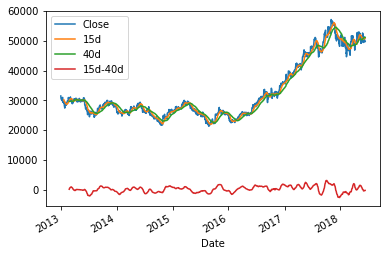

In [10]:
%matplotlib inline
price_df.plot()

In [11]:
price_df.head(3)

,Close,15d,40d,15d-40d
Date,,,,
2013-01-02,31520.0,NaN,NaN,NaN
2013-01-03,30860.0,NaN,NaN,NaN
2013-01-04,30500.0,NaN,NaN,NaN


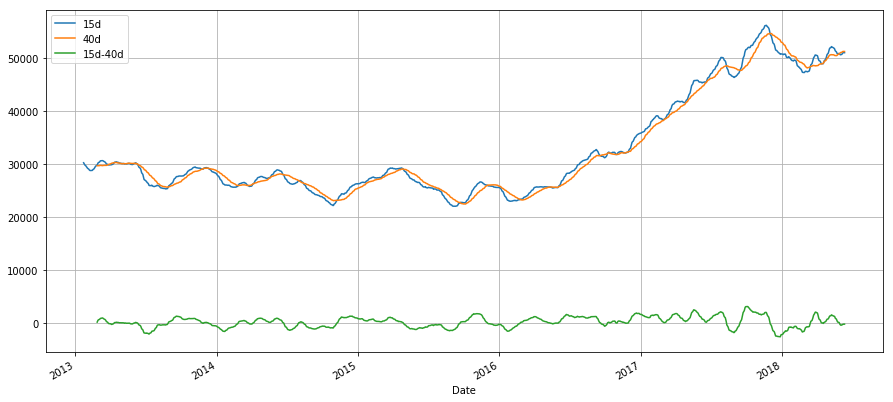

In [12]:
%matplotlib inline
# price_df['Close'].plot(grid = True, figsize = (15, 7))
price_df['15d'].plot(grid = True, figsize = (15, 7))
price_df['40d'].plot(grid = True)
price_df['15d-40d'].plot(grid = True)

import matplotlib.pyplot as plt
plt.legend()

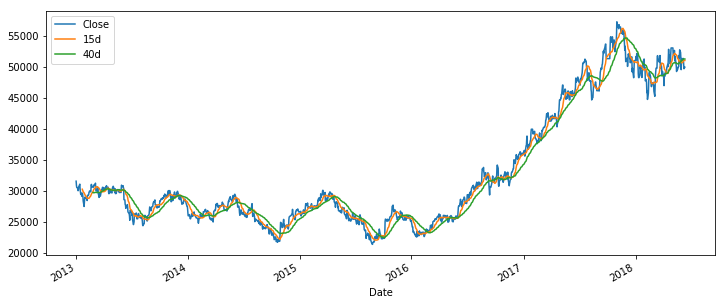

In [13]:
price_df.iloc[:, :3].plot(figsize=(12,5))

<br>
### **04 매매 시점 데이터 생성하기**
np.where(조건문, True 일떄 값, False 일떄 값)

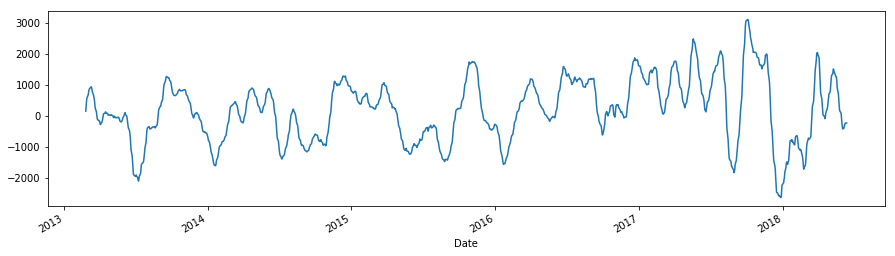

In [14]:
price_df['15d-40d'].plot(figsize=(15,4))

In [15]:
X = 100
price_df['Stance'] = np.where(price_df['15d-40d']> X,  1, 0)
price_df['Stance'] = np.where(price_df['15d-40d']< -X, -1, price_df['Stance'])
price_df['Stance'].value_counts()                             

 1    752
-1    497
 0    161
Name: Stance, dtype: int64

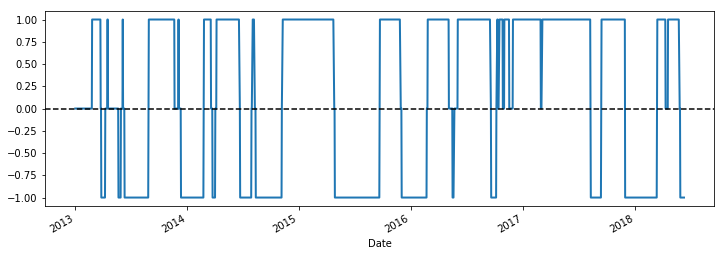

In [16]:
price_df['Stance'].plot(lw = 2, ylim = [-1.1, 1.1], figsize=(12,4))
plt.axhline(y = 0, linestyle = '--', color = 'k')

<br>
### **05 SMAC_Strategy (이동평균선 전략)으로 인한 수익률  데이터 생성**
주가를 로그 수익률로 변환한다 : 복리공식에 비해 계산의 용이성

### **np.shift()**

### **np.log()**

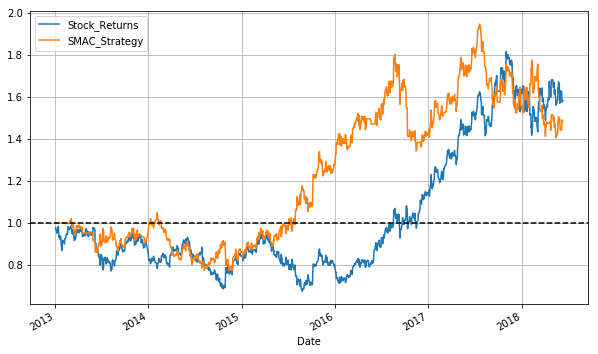

In [17]:
# 로그수익률
price_df['Stock_Returns'] = np.log(price_df['Close'] / price_df['Close'].shift(1))
price_df['SMAC_Strategy'] = price_df['Stock_Returns'] * price_df['Stance'].shift(1)
price_df[['Stock_Returns','SMAC_Strategy']].cumsum().apply(np.exp).plot(grid = True, figsize = (10,6))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

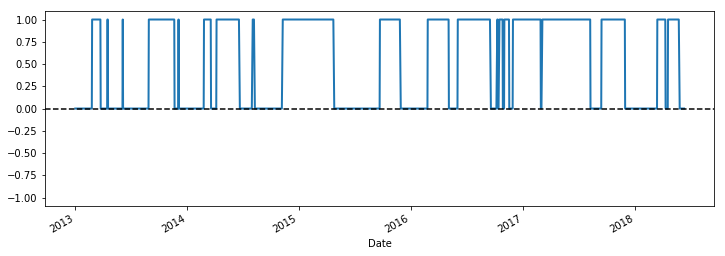

In [18]:
price_df['Stance2'] = np.where(price_df['15d-40d']>X,  1, 0)
price_df['Stance2'].plot(lw = 2, ylim = [-1.1, 1.1], figsize=(12,4))
plt.axhline(y = 0, linestyle = '--', color = 'k')

In [19]:
price_df['Stock_Returns']  = np.log(price_df['Close']  / price_df['Close'].shift(1))    
price_df['SMAC_Strategy2'] = price_df['Stock_Returns'] * price_df['Stance2'].shift(1) 

In [20]:
# price_df_log
price_df_log = price_df[['Stock_Returns','SMAC_Strategy','SMAC_Strategy2']].cumsum().apply(np.exp)
price_df_log.head(3)

,Stock_Returns,SMAC_Strategy,SMAC_Strategy2
Date,,,
2013-01-02,NaN,NaN,NaN
2013-01-03,0.979061,1.0,1.0
2013-01-04,0.967640,1.0,1.0


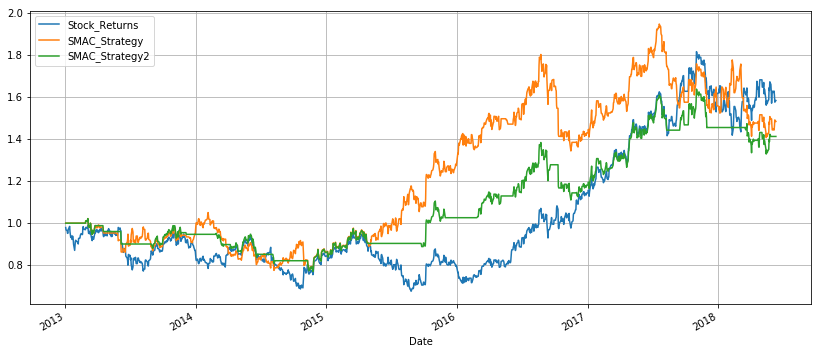

In [21]:
price_df_log.plot(grid = True, figsize = (14,6))

In [22]:
price_df.tail()

,Close,15d,40d,15d-40d,Stance,Stock_Returns,SMAC_Strategy,Stance2,SMAC_Strategy2
Date,,,,,,,,,
2018-06-05,51300.0,50810.00,51132.25,-322.25,-1,0.003906,-0.003906,0,0.0
2018-06-06,51300.0,50906.67,51193.25,-286.58,-1,0.000000,-0.000000,0,0.0
2018-06-07,50600.0,50986.67,51233.25,-246.58,-1,-0.013739,0.013739,0,-0.0
2018-06-08,49650.0,50996.67,51229.50,-232.83,-1,-0.018953,0.018953,0,-0.0
2018-06-11,49900.0,50990.00,51218.50,-228.50,-1,0.005023,-0.005023,0,0.0


<br>
### **06 기간별 수익률 계산하기**
로그 수익률 계산하기

In [23]:
price_df.SMAC_Strategy['2017-05'].sum()

0.0017913126151367523

In [24]:
price_df.SMAC_Strategy2['2017-07'].sum()

0.013787559124506405